<div class="head0">
    <div class="head0__name">
        Examples for grid module
    </div>
    <div class="head0__note">
        Construction and representation of uniform or Chebyshev multidimensional grid.
    </div>
</div>

In [1]:
import numpy as np
from fpcross import init_jupyter, Grid

init_jupyter()

Start | 11:02AM MSK on Oct 07, 2019 |
-------------------------------------


<div class="head1">
    <div class="head1__name">
        Init grid
    </div>
    <div class="head1__note">
        We can init grid using various types for it parameters.
    </div>
</div>

In [2]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimension        : 2
D1               : Poi 5   | Min -4.000 | Max 3.000  |
D2               : Poi 7   | Min -1.000 | Max 2.000  |
------------------



In [3]:
GR = Grid(n=5, l=[[-4., 3.], [-1., 2.]])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimension        : 2
D1               : Poi 5   | Min -4.000 | Max 3.000  |
D2               : Poi 5   | Min -1.000 | Max 2.000  |
------------------



In [4]:
GR = Grid(d=2, n=5, l=[-4., 3.])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimension        : 2
D1               : Poi 5   | Min -4.000 | Max 3.000  |
D2               : Poi 5   | Min -4.000 | Max 3.000  |
------------------



<div class="head1">
    <div class="head1__name">
        Compute grid points
    </div>
    <div class="head1__note">
        We can find some or all grid points.
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Some points of uniform grid
    </div>
</div>

In [5]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='u')
X = GR.comp([0, 0])
print(X.shape, X.reshape(-1))
X = GR.comp([4, 6])
print(X.shape, X.reshape(-1))
X = GR.comp([
    [0, 4],
    [0, 6],
])
print(X)

(2, 1) [-4. -1.]
(2, 1) [3. 2.]
[[-4.  3.]
 [-1.  2.]]


In [6]:
I = np.array([
    [0, 4],
    [0, 6],
])
n = np.repeat(GR.n.reshape((-1, 1)), I.shape[1], axis=1)
t = I * 1. / (n - 1)
l1 = np.repeat(GR.l[:, 0].reshape((-1, 1)), I.shape[1], axis=1)
l2 = np.repeat(GR.l[:, 1].reshape((-1, 1)), I.shape[1], axis=1)
X = t * (l2 - l1) + l1
X

array([[-4.,  3.],
       [-1.,  2.]])

<div class="head2">
    <div class="head2__name">
        Some points of Chebyshev grid
    </div>
</div>

In [7]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='c')
X = GR.comp([0, 0])
print(X.shape, X.reshape(-1))
X = GR.comp([4, 6])
print(X.shape, X.reshape(-1))
X = GR.comp([
    [0, 4],
    [0, 6],
])
print(X)

(2, 1) [3. 2.]
(2, 1) [-4. -1.]
[[ 3. -4.]
 [ 2. -1.]]


<div class="head2">
    <div class="head2__name">
        Full grid
    </div>
</div>

In [9]:
GR = Grid(n=[3, 4], l=[[-4., 3.], [-1., 2.]])
X = GR.comp()
print(X)

[[ 3.   -0.5  -4.    3.   -0.5  -4.    3.   -0.5  -4.    3.   -0.5  -4.  ]
 [ 2.    2.    2.    1.25  1.25  1.25 -0.25 -0.25 -0.25 -1.   -1.   -1.  ]]


<div class="head1">
    <div class="head1__name">
        Plot grid
    </div>
    <div class="head1__note">
        We can plot 2-dimensional grid (full or some its points).
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Some points of uniform grid
    </div>
</div>

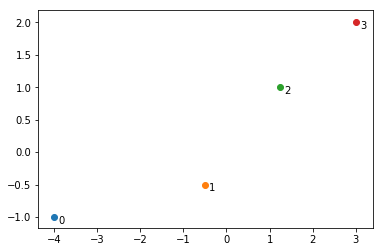

In [10]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='u')
GR.plot(I=[
    [0, 2, 3, 4],
    [0, 1, 4, 6]
])

<div class="head2">
    <div class="head2__name">
        Full uniform grid
    </div>
</div>

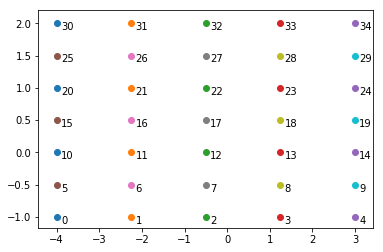

In [11]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='u')
GR.plot()

<div class="head2">
    <div class="head2__name">
        Some points of Chebyshev grid
    </div>
</div>

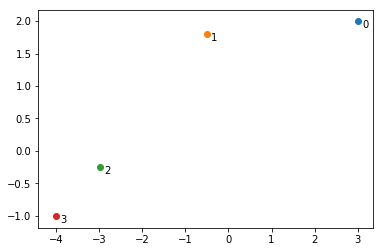

In [12]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='c')
GR.plot(I=[
    [0, 2, 3, 4],
    [0, 1, 4, 6]
])

<div class="head2">
    <div class="head2__name">
        Full Chebyshev grid
    </div>
</div>

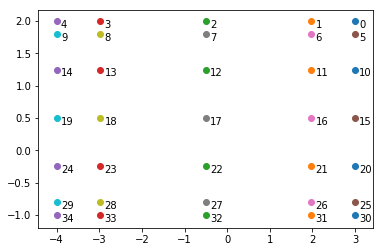

In [13]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]], kind='c')
GR.plot()

<div class="end"></div>